In [349]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [350]:
df = pd.read_csv('Fatal-Highway.txt', sep = '\t')

In [351]:
df['Incident'].nunique()

762

FITM- Freeway Incident Traffic Management Plans (FITM) 

SHA- State Highway Administration

CHART- Coordinated Highways Action Response Team.

In [371]:
df

,Incident,Event,Time
0,MDOT_CHART_00000000000000000000000000000006,Incident start,2010-07-21 16:35:20-04
1,MDOT_CHART_00000000000000000000000000000006,CHART Unit responded,2010-07-21 16:35:30-04
2,MDOT_CHART_00000000000000000000000000000006,CHART Unit responded,2010-07-21 16:44:10-04
3,MDOT_CHART_00000000000000000000000000000006,Arrow Board responded,2010-07-21 16:44:39-04
4,MDOT_CHART_00000000000000000000000000000006,State Police responded,2010-07-21 16:44:39-04
...,...,...,...
16759,MDOT_CHART_ffff9e3aac3105eb004d822e33235daa,Investigation-accident notified,2011-06-05 04:44:29-04
16760,MDOT_CHART_ffff9e3aac3105eb004d822e33235daa,Arrow Board arrived,2011-06-05 04:44:36-04
16761,MDOT_CHART_ffff9e3aac3105eb004d822e33235daa,Medical Examiner arrived,2011-06-05 04:44:36-04
16762,MDOT_CHART_ffff9e3aac3105eb004d822e33235daa,SHA 3404 departed,2011-06-05 08:30:45-04


In [373]:
df['Time']= pd.to_datetime(df['Time'])

In [375]:
df.to_csv('high',index=False)

In [352]:
a= df['Event'].value_counts()
x = pd.DataFrame(a)
y = x.loc[x['Event'] <100]

In [353]:
y

,Event
CHART Unit 9001 notified,95
Investigation-accident responded,93
CHART Unit 9700 notified,90
Arrow Board responded,90
CHART Unit 9300 departed,83
...,...
2500/MICHAEL LEWIS notified,1
7330/JEFF DALTON 240 674-0561 notified,1
9403/BRYAN WALKER departed,1
BROWNING'S ROLLBACK arrived,1


Aggregating CHART actions by removing specefic unit number. 

In [354]:
df.Event.replace(r'(CHART.+responded)' , 'CHART Unit responded', 
                           regex=True, inplace=True)
df.Event.replace(r'(CHART.+notified)' , 'CHART Unit notified', 
                           regex=True, inplace=True)
df.Event.replace(r'(CHART.+departed)' , 'CHART Unit departed', 
                           regex=True, inplace=True)
df.Event.replace(r'(CHART.+arrived)' , 'CHART Unit arrived', 
                           regex=True, inplace=True)
df.Event.replace(r'(CHART.+removed)' , 'CHART Unit removed', 
                           regex=True, inplace=True)

Removing any Incident that happened just once.

In [355]:
df = df[df.duplicated('Event', keep=False)]

In [356]:
df.head(5)

,Incident,Event,Time
0,MDOT_CHART_00000000000000000000000000000006,Incident start,2010-07-21 16:35:20-04
1,MDOT_CHART_00000000000000000000000000000006,CHART Unit responded,2010-07-21 16:35:30-04
2,MDOT_CHART_00000000000000000000000000000006,CHART Unit responded,2010-07-21 16:44:10-04
3,MDOT_CHART_00000000000000000000000000000006,Arrow Board responded,2010-07-21 16:44:39-04
4,MDOT_CHART_00000000000000000000000000000006,State Police responded,2010-07-21 16:44:39-04


Looking at the most commonly occuring events

In [357]:
a= df['Event'].value_counts()
x = pd.DataFrame(a)
y = x.loc[x['Event'] >200] #Change number of instances two see occurence of events

In [358]:
y.reset_index(level=0, inplace=True)
x.reset_index(level=0, inplace=True)

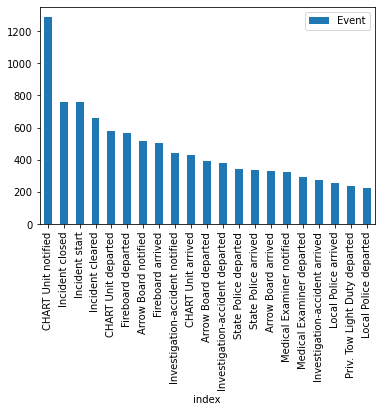

In [359]:
y.plot(kind='bar',x= 'index',y='Event')

Making a Data Frame with just the time taken to deal with an incident

In [360]:
df1 = df[(df['Event'] == 'Incident start') | (df['Event'] == 'Incident closed')]
df1 = df1.groupby('Incident').apply(
        lambda g: pd.Series(g['Time'].values))
df1['Time'] = (pd.to_datetime(df1[1]) - pd.to_datetime(df1[0]))
df1.reset_index(level=0, inplace=True)
df1.columns = ['Incident', 'Start', 'Close', 'Time']

In [361]:
df1.head(1)

,Incident,Start,Close,Time
0,MDOT_CHART_00000000000000000000000000000006,2010-07-21 16:35:20-04,2010-07-21 19:24:52-04,02:49:32


The following dataset has the count of unique events for each incident. Will use this to count average occurence of any event in an incident.

In [362]:
df_avg= pd.DataFrame()
for g, temp in df.groupby('Incident'):
    et= temp['Event'].value_counts()
    df2= pd.DataFrame(et)
    df2['I']=g
    df_avg = df_avg.append(df2)
    a=a+1
    
df_avg.reset_index(level=0, inplace=True)

In [363]:
df_avg= df_avg.groupby('index', as_index=False)['Event'].sum()
df_avg = pd.DataFrame(df_avg)
df_avg = df_avg.sort_values(by=['Event'], ascending=False)

In [364]:
df_avg['Event']= df_avg['Event']/762

In [368]:
df_avg.head(5)

,index,Event
232,CHART Unit notified,1.690289
297,Incident start,1.000000
296,Incident closed,1.000000
295,Incident cleared,0.863517
231,CHART Unit departed,0.755906


In [369]:
freq_100 = df_avg.loc[df_avg['Event'] >0.2]

In [370]:
freq_100

,index,Event
232,CHART Unit notified,1.690289
297,Incident start,1.000000
296,Incident closed,1.000000
295,Incident cleared,0.863517
231,CHART Unit departed,0.755906
283,Fireboard departed,0.740157
215,Arrow Board notified,0.674541
282,Fireboard arrived,0.661417
305,Investigation-accident notified,0.578740
230,CHART Unit arrived,0.566929
